#Linear Regression Model from Scratch

##Creating the Linear Regression Model in LinearRegression Class

In [58]:
import numpy as np
class LinearRegression():

  # defining the constructor
  def __init__(self, lr, epochs=1000):
    self.weights = None
    self.bias = None
    self.lr = lr
    self.epochs = epochs


  # defining the fit function
  def fit(self, X, y):

    # initializing the weights and bias
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    # defining the tolerance
    tol = 1e-5

    prev_loss = 0

    for _ in range(self.epochs):

      y_pred = np.dot(X, self.weights) + self.bias

      # calculating the gradients
      dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
      db = (1/n_samples) * np.sum(y_pred - y)

      # adjusting the weights and bias values
      self.weights -= self.lr * dw
      self.bias -= self.lr * db

      #current loss function
      curr_loss = np.mean(np.square(y - y_pred))

      # checking if the difference between the current loss and previous loss is not changing by much, then break the loop
      if abs(prev_loss - curr_loss) < tol:
        break

      prev_loss = curr_loss

    print(self.weights.shape, self.bias.shape)

  # defining the predict function
  def predict(self, X):
    return np.dot(X, self.weights) + self.bias




##Loading all modules and libraries

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Creating training and test datasets

In [60]:

n_samples = 1000
n_features = 10
X, y = make_regression(n_samples=n_samples, n_features=n_features,
                       n_informative=5, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10'])
data['Label'] = y
data.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Label
0,0.123429,-1.253402,0.370340,0.101788,0.092628,-0.589254,0.306348,-1.458213,1.630130,1.242863,18.926845
1,-0.216827,0.214983,-0.028817,-1.701140,0.264482,0.314972,0.374062,-0.292758,0.501900,0.063702,-56.463272
2,0.388979,1.655407,-0.755792,-1.161784,-0.300860,1.048707,-0.283139,0.251474,-0.194269,-1.209477,-28.971405
3,0.219072,-0.251552,-1.095871,-0.806520,-0.435139,2.768374,1.677201,-0.475392,-0.835870,-1.314879,-0.761331
4,0.715734,0.383168,-0.686715,-1.236136,0.731001,1.623885,1.254338,2.394362,2.185095,0.538435,6.578192


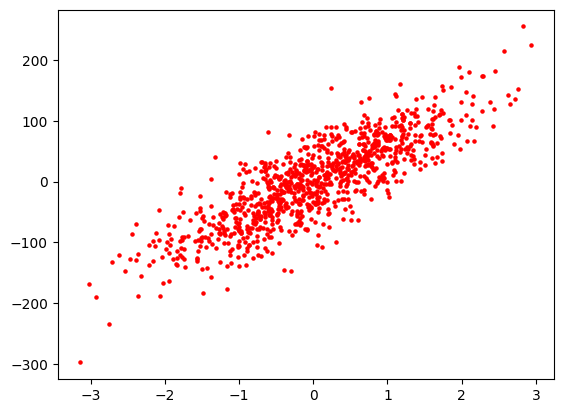

In [62]:
plt.scatter(X[:, 0], y, color = "red", marker="o", s=5)
plt.show()

## Fitting the model and predicting the values

In [63]:
def mse(y_true, y_pred):
  return np.mean(np.square(y_true - y_pred))

In [64]:
model = LinearRegression(0.003)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


(10,) ()


In [65]:
mse_pred = mse(y_pred, y_test)
mse_pred

np.float64(85.26106754549404)

##Visualising the training label values and model predicted values

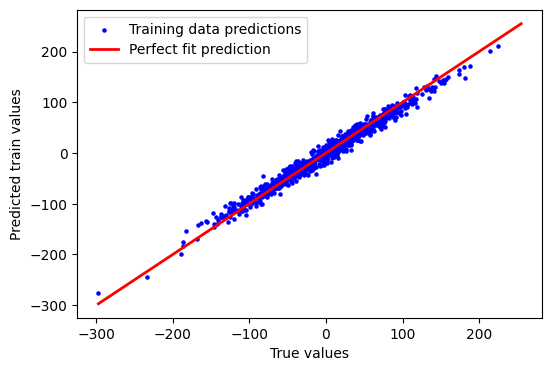

In [66]:
y_pred_train = model.predict(X_train)

fig = plt.figure(figsize=(6,4))
plt.scatter(y_train, y_pred_train, color="blue", s=5, label="Training data predictions")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linewidth=2, label="Perfect fit prediction")
plt.xlabel("True values")
plt.ylabel("Predicted train values")
plt.legend()
plt.show()

##Visualising the test label values and the model predicted values

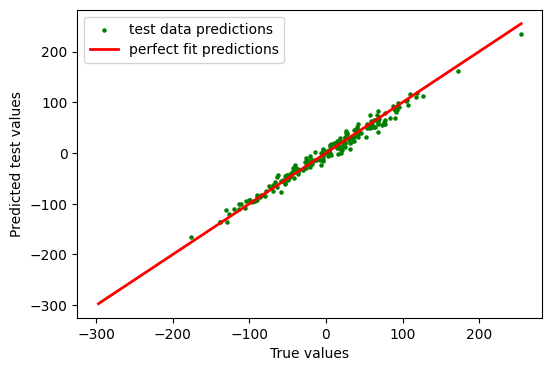

In [67]:
y_pred_test = model.predict(X_test)

fig = plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_test, color="green", s=5, label="test data predictions")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linewidth=2, label="perfect fit predictions")
plt.xlabel("True values")
plt.ylabel("Predicted test values")
plt.legend()
plt.show()

## Testing the model for houses median price prediction.

### Loading and Visualising the data

In [68]:
X_2_train = pd.read_csv('sample_data/california_housing_train.csv')
X_2_test = pd.read_csv('sample_data/california_housing_test.csv')

X_2_train_final = X_2_train.drop(['median_house_value'], axis=1)
y_2_train = X_2_train['median_house_value']

X_2_test_final = X_2_test.drop(['median_house_value'], axis=1)
y_2_test = X_2_test['median_house_value']

In [69]:
X_2_test_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [70]:
y_2_test.head()

,median_house_value
0,344700.0
1,176500.0
2,270500.0
3,330000.0
4,81700.0


### Function Scale the data using min-max scaling

In [71]:
def minmax_scale_data(data, feature_columns=None):
    """
    Scales the given dataset using Min-Max Scaling (range [0,1]).

    Parameters:
    -----------
    data : pd.DataFrame
        The input dataset containing numeric features.
    feature_columns : list (optional)
        The list of feature column names to scale.
        If None, all numeric columns will be scaled.

    Returns:
    --------
    scaled_df : pd.DataFrame
        DataFrame with scaled features (range [0,1]).
    scaler : MinMaxScaler
        The fitted scaler (useful if you want to transform test data later).
    """

    # If no specific columns given, take all numeric columns
    if feature_columns is None:
        feature_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Extract features
    X = data[feature_columns]

    # Initialize scaler
    scaler = MinMaxScaler()

    # Fit and transform
    X_scaled = scaler.fit_transform(X)

    # Convert back to DataFrame
    scaled_df = pd.DataFrame(X_scaled, columns=feature_columns, index=data.index)

    return scaled_df, scaler

In [72]:
X_2_train_final = minmax_scale_data(X_2_train_final, ['longitude','latitude','housing_median_age',
            'total_rooms','total_bedrooms','population',
            'households','median_income'])[0]
X_2_test_final = minmax_scale_data(X_2_test_final, ['longitude','latitude','housing_median_age',
            'total_rooms','total_bedrooms','population',
            'households','median_income'])[0]


In [73]:
X_2_train_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281


In [74]:
X_2_test_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.219814,0.513889,0.509804,0.127414,0.121654,0.128416,0.122565,0.421277
1,0.606811,0.181624,0.823529,0.049402,0.056858,0.067393,0.055804,0.213728
2,0.657379,0.130342,0.509804,0.117691,0.093225,0.123973,0.100041,0.365064
3,0.600619,0.134615,0.529412,0.002004,0.002400,0.003688,0.001826,0.388684
4,0.465428,0.402778,0.352941,0.040566,0.044674,0.070830,0.047687,0.168108


In [102]:
model_2 = LinearRegression(0.003, epochs = 100)
model_2.fit(X_2_train_final, y_2_train)
y_pred_2 = model_2.predict(X_2_test_final)

(8,) ()


np.float64(27424851645.557243)

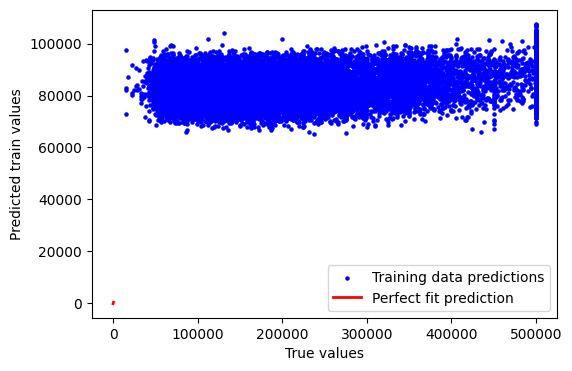